In [ ]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules

Segments to look out for that had no axon
864691135012395766 # one of the split segments files not there (split index = 1)
864691135865584005 #soma soma merger
864691136451113215 #it was an inhibitory neuron (part of split)

"""

In [12]:
%load_ext autoreload
%autoreload 2

INFO - 2021-06-03 17:42:43,229 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-03 17:42:43,230 - settings - Setting database.user to celiib
INFO - 2021-06-03 17:42:43,231 - settings - Setting database.password to newceliipass
INFO - 2021-06-03 17:42:43,231 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-03 17:42:43,232 - settings - Setting database.user to celiib
INFO - 2021-06-03 17:42:43,232 - settings - Setting database.password to newceliipass
INFO - 2021-06-03 17:42:43,236 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-03 17:42:44,137 - settings - Setting enable_python_native_blobs to True


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

In [14]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-06-03 17:42:44,645 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-03 17:42:44,647 - settings - Setting database.user to celiib
INFO - 2021-06-03 17:42:44,648 - settings - Setting database.password to newceliipass
INFO - 2021-06-03 17:42:44,652 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-03 17:42:45,559 - settings - Setting enable_python_native_blobs to True


In [15]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [16]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [17]:
"""
Pseudocode: 
1) Check if there are multiple somas associated with that segment

"""

'\nPseudocode: \n1) Check if there are multiple somas associated with that segment\n\n'

In [18]:
axon_segs = dj.U("segment_id") & (minnie.DecompositionAxon() 
                      & minnie.AutoProofreadValidationSegment4() - minnie.AutoProofreadValidationSegmentExclude4() )
axon_segs

segment_id segment id unique within each Segmentation
864691134988385914
864691134988386682
864691135012541942
864691135058565275
864691135058593947
864691135065011524
864691135099943968
864691135113167769
864691135210028736
864691135212632448


In [19]:
"""
Pseudocode: 
1) Find the coordinates of the nucleus for that new segment
2) Make sure that same number of DecompositionAxon objects as in Decomposition
3) Pick the neuron object that is closest and within a certain range of the nucleus
4) Download the neuron object
5) Run the proofreading
6) Save off the validation df
"""

'\nPseudocode: \n1) Find the coordinates of the nucleus for that new segment\n2) Make sure that same number of DecompositionAxon objects as in Decomposition\n3) Pick the neuron object that is closest and within a certain range of the nucleus\n4) Download the neuron object\n5) Run the proofreading\n6) Save off the validation df\n'

In [20]:
minnie.AutoProofreadValidationScore5()

ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,decomposition saved neuron object with high fidelity axon,axon_length axon length of the filtered neuron,validation_df,validation_df_ext,pre_tp,pre_tn,pre_fp,pre_fn,pre_precision,pre_recall,pre_f1,post_tp,post_tn,post_fp,post_fn,post_precision,post_recall,post_f1,run_time the amount of time to run (seconds)
88.00,189149,864691135855890478,0.08,0,=BLOB=,369.84999619148164,=BLOB=,=BLOB=,7,160,11,0,0.3888888888888889,1.0,0.56,5281,7,39,3,0.9926691729323308,0.9994322482967449,0.9960392304790645,419.79
88.00,223037,864691136227167569,0.08,0,=BLOB=,63.375728490237755,=BLOB=,=BLOB=,0,450,0,0,nan,nan,nan,1,3410,3859,0,0.00025906735751295336,1.0,0.000518000518000518,287.47
88.00,225498,864691135753932237,0.08,0,=BLOB=,185.8554437449504,=BLOB=,=BLOB=,6,77,0,5,1.0,0.5454545454545454,0.7058823529411764,1124,0,0,9,1.0,0.9920564872021183,0.9960124058484714,114.89
88.00,230236,864691135609687047,0.08,0,=BLOB=,1573.0087006301437,=BLOB=,=BLOB=,34,550,11,16,0.7555555555555555,0.68,0.7157894736842104,1961,22,1,1,0.9994903160040775,0.9994903160040775,0.9994903160040775,423.5
88.00,236197,864691136903144370,0.08,0,=BLOB=,40.753447012345966,=BLOB=,=BLOB=,0,975,0,5,nan,0.0,nan,2750,2329,7,48,0.9974610083424011,0.9828448892065761,0.99009900990099,466.12
88.00,258307,864691135293126156,0.08,0,=BLOB=,1095.334412475715,=BLOB=,=BLOB=,43,335,17,27,0.7166666666666667,0.6142857142857143,0.6615384615384615,2984,7,25,19,0.9916915918909937,0.9936729936729937,0.9926813040585496,346.12
88.00,262773,864691136023889209,0.08,0,=BLOB=,191.70683649485437,=BLOB=,=BLOB=,9,48,2,0,0.8181818181818182,1.0,0.9,724,0,2,10,0.9972451790633609,0.9863760217983651,0.9917808219178083,98.98
88.00,264870,864691136951664863,0.08,0,=BLOB=,1021.2379299332463,=BLOB=,=BLOB=,31,422,2,1,0.9393939393939394,0.96875,0.9538461538461539,2008,25,4,33,0.9980119284294234,0.9838314551690348,0.9908709597828769,265.38
88.00,269247,864691135584074360,0.08,0,=BLOB=,2058.547022789378,=BLOB=,=BLOB=,209,65,0,10,1.0,0.954337899543379,0.9766355140186915,807,0,7,64,0.9914004914004914,0.9265212399540758,0.9578635014836795,406.2
88.00,269380,864691135974639471,0.08,0,=BLOB=,437.8471079089947,=BLOB=,=BLOB=,27,257,4,11,0.8709677419354839,0.7105263157894737,0.782608695652174,1863,4,8,3,0.9957242116515232,0.9983922829581994,0.9970564624029972,269.68


In [ ]:
bad_postsyn_table = (minnie.AutoProofreadValidationScore5() & "post_fn>200")
bad_postsyn_table_filt =  (bad_postsyn_table * minnie.AutoProofreadValidationSegmentMap4()) & axon_segs.proj(old_segment_id="segment_id")
#bad_postsyn_seg_ids = bad_postsyn_table.fetch("segment_id")
bad_postsyn_table_filt.proj("post_fn")

In [ ]:
minnie.AutoProofreadValidationScore5()

In [52]:
import datajoint as dj
dj.config["display.limit"] = 30
bad_presyn_table = (minnie.AutoProofreadValidationScore5() & "pre_fp>10")
bad_presyn_seg_ids = bad_presyn_table.fetch("segment_id")
bad_presyn_table

ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,decomposition saved neuron object with high fidelity axon,axon_length axon length of the filtered neuron,validation_df,validation_df_ext,pre_tp,pre_tn,pre_fp,pre_fn,pre_precision,pre_recall,pre_f1,post_tp,post_tn,post_fp,post_fn,post_precision,post_recall,post_f1,run_time the amount of time to run (seconds)
88.00,189149,864691135855890478,0.08,0,=BLOB=,369.84999619148164,=BLOB=,=BLOB=,7,160,11,0,0.3888888888888889,1.0,0.56,5281,7,39,3,0.9926691729323308,0.9994322482967449,0.9960392304790645,419.79
88.00,230236,864691135609687047,0.08,0,=BLOB=,1573.0087006301437,=BLOB=,=BLOB=,34,550,11,16,0.7555555555555555,0.68,0.7157894736842104,1961,22,1,1,0.9994903160040775,0.9994903160040775,0.9994903160040775,423.5
88.00,258307,864691135293126156,0.08,0,=BLOB=,1095.334412475715,=BLOB=,=BLOB=,43,335,17,27,0.7166666666666667,0.6142857142857143,0.6615384615384615,2984,7,25,19,0.9916915918909937,0.9936729936729937,0.9926813040585496,346.12
88.00,301095,864691135446675028,0.08,0,=BLOB=,1055.1068220195411,=BLOB=,=BLOB=,11,374,27,4,0.2894736842105263,0.7333333333333333,0.4150943396226416,3323,8,6,26,0.9981976569540403,0.992236488504031,0.9952081461515423,409.26
88.00,335175,864691135367058169,0.08,0,=BLOB=,1591.5060906493547,=BLOB=,=BLOB=,9,178,20,0,0.3103448275862069,1.0,0.4736842105263158,2216,8,6,25,0.9972997299729973,0.9888442659526997,0.9930539995518709,296.08
88.00,493968,864691135117980637,0.08,0,=BLOB=,2092.8960560199407,=BLOB=,=BLOB=,59,617,32,1,0.6483516483516484,0.9833333333333333,0.7814569536423841,3602,2,49,1,0.9865790194467269,0.9997224535109631,0.9931072511717672,382.4
88.00,518853,864691135415666362,0.08,0,=BLOB=,3479.5429689276298,=BLOB=,=BLOB=,324,475,35,10,0.9025069637883009,0.9700598802395209,0.9350649350649352,9304,4,3,5,0.9996776619748576,0.99946288537974,0.9995702621400945,992.68
88.00,519746,864691135724453547,0.08,0,=BLOB=,2175.7201665363345,=BLOB=,=BLOB=,71,236,15,21,0.8255813953488372,0.7717391304347826,0.797752808988764,5068,7,9,31,0.9982272995863699,0.9939203765444204,0.996069182389937,593.89
88.00,525498,864691135233242713,0.08,0,=BLOB=,1589.3082002015249,=BLOB=,=BLOB=,40,389,15,8,0.7272727272727273,0.8333333333333334,0.7766990291262137,6013,4,6,1,0.9990031566705433,0.9998337213169272,0.9994182664339731,627.65
88.00,553283,864691135181923074,0.08,0,=BLOB=,816.0229998200101,=BLOB=,=BLOB=,13,104,22,3,0.37142857142857144,0.8125,0.5098039215686275,4188,1,0,0,1.0,1.0,1.0,212.56


In [ ]:
# multi_soma_keys = (minnie.AutoProofreadValidationSegmentMap4() & "n_somas>1"
#                       & minnie.DecompositionAxon.proj(old_segment_id="segment_id")
#                   & dict(segment_id = 864691135415710906)).proj().fetch(as_dict=True)
# key = multi_soma_keys[0]
# key

In [53]:
segment_id = 864691135117980637
key = dict(segment_id=segment_id)

In [54]:
verbose = True

segment_id=key["segment_id"]
print(f"\n-- Working on neuron {segment_id}---")

segment_map_dict = (minnie.AutoProofreadValidationSegmentMap4() & key).fetch1()

#1) Find the coordinates of the nucleus for that new segment
nucleus_id = segment_map_dict["nucleus_id"]
nuc_center_coords = du.nuclei_id_to_nucleus_centers(nucleus_id)
if verbose:
    print(f"nuc_center_coords = {nuc_center_coords}")

#2) Make sure that same number of DecompositionAxon objects as in Decomposition
old_segment_id = segment_map_dict["old_segment_id"]
if verbose:
    print(f"old_segment_id = {old_segment_id}")
    
search_key = dict(segment_id=old_segment_id)
n_somas = len(minnie.BaylorSegmentCentroid() & search_key)
n_decomp_axon = len(minnie.DecompositionAxon() & search_key)
if verbose:
    print(f"# of somas = {n_somas} and # of DecompositionAxon = {n_decomp_axon}")
    

if n_somas != n_decomp_axon:
    raise Exception(f"# of somas = {n_somas} NOT MATCH # of DecompositionAxon = {n_decomp_axon}")
    
#3) Pick the neuron object that is closest and within a certain range of the nucleus
neuron_objs,split_idxs = du.decomposition_with_spine_recalculation(old_segment_id)
if n_somas > 1:
    """
    Finding the closest soma:
    1) For each neuron object get the mesh center of the soma object
    2) Find the distance of each from the nucleus center
    3) Find the arg min distance and make sure within threshold
    4) Mark the current neuron and the current split index
    """
    nuclei_distance_threshold = 15000

    soma_center_coords = [k["S0"].mesh_center for k in neuron_objs]
    soma_distances = [np.linalg.norm(k-nuc_center_coords) for k in soma_center_coords]
    min_dist_arg = np.argmin(soma_distances)
    min_dist = soma_distances[min_dist_arg]

    if verbose:
        print(f"soma_distances = {soma_distances}")
        print(f"min_dist_arg = {min_dist_arg}, with min distance = {min_dist}")

    if min_dist > nuclei_distance_threshold:
        raise Exception(f"min_dist ({min_dist}) larger than nuclei_distance_threshold ({nuclei_distance_threshold})")

    neuron_obj = neuron_objs[min_dist_arg]
    split_index = split_idxs[min_dist_arg]

    if verbose:
        print(f"Winning split_index = {split_index}")
else:
    split_index = split_idxs[0]
    neuron_obj = neuron_objs[0]
    
    
import proofreading_utils as pru
import validation_utils as vu
(filt_neuron,
     return_synapse_df_revised,
     return_synapse_df_errors,
    return_validation_df_revised,
    return_validation_df_extension) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = pru.v5_exc_filters(),
                        plot_limb_branch_filter_with_disconnect_effect = True,
                        verbose = True,
                        plot_score=False,
                        nucleus_id = nucleus_id,
                        return_synapse_df_errors=True,
                        return_validation_df_extension = True,                                        
                        split_index=split_index)
    


-- Working on neuron 864691135117980637---
nuc_center_coords = [1168896  641600 1029320]
old_segment_id = 864691135974454383
# of somas = 1 and # of DecompositionAxon = 1
**Using table __decomposition_axon for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Dont need spine recalculation
Number of Neurons found = 1

*****Using v5 Filters!!!



--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}




Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 1:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {'offset': 1500, 'comparison_distance': 2000, 'worst_case_match_threshold': 65, 'width_diff_max': 75, 'width_diff_perc': 60, 'match_threshold': 45, 'angle_buffer': 15, 'max_degree_to_resolve': 6, 'max_degree_to_resolve_wide': 8, 'match_method': 'best_match', 'kiss_check': True, 'kiss_check_bbox_longest_side_threshold': 450}




 ----- Working on coordinate 0: [1126572.87699544  699073.01918174 1054412.97573984]--------
winning_downstream = 4,error_downstream = [8 9] 
coordinate [1126572.87699544  699073.01918174 1054412.97573984] had error branches [8 9]--------


 ----- Working on coordinate 1: [1146270.69919383  918285.42265269 1086061.27120456]--------
winning_downstream = 12,error_downstream = [11 14] 
coordinate [1146270.69919383  918285.42265269 1086061.27120456] had error branches [11 14]--------


 ----- Working on coordinate 2: [1150781.88806206


--- Working on filter 2:
function = axon_webbing_t_merges
function __name__ = filter_away_webbing_t_merges
function arguments = {'child_width_maximum': 75, 'parent_width_maximum': 75, 'axon_only': True, 'error_if_web_is_none': True, 'web_size_threshold': 120, 'web_size_type': 'ray_trace_median', 'web_above_threshold': True}


limb_branch_dict_to_cancel = {}

--- Working on filter 3:
function = thick_t_merge
function __name__ = filter_away_thick_t_merge
function arguments = {}


limb_branch_dict_to_cancel = {}

--- Working on filter 4:
function = width_jump_up_dendrite
function __name__ = filter_away_width_jump_up_dendrite
function arguments = {}


limb_branch_dict_to_cancel = {}

--- Working on filter 5:
function = width_jump_up_axon
function __name__ = filter_away_width_jump_up_axon
function arguments = {}


limb_branch_dict_to_cancel = {}

--- Working on filter 6:
function = double_back_dendrite
function __name__ = filter_away_double_back_dendrite
function arguments = {}


limb_bran

Segment Id = 864691135974454383
Postsyn counts:
TP:3602
TN:2
FP:49
FN:1
Presyn counts:
TP:59
TN:617
FP:32
FN:1


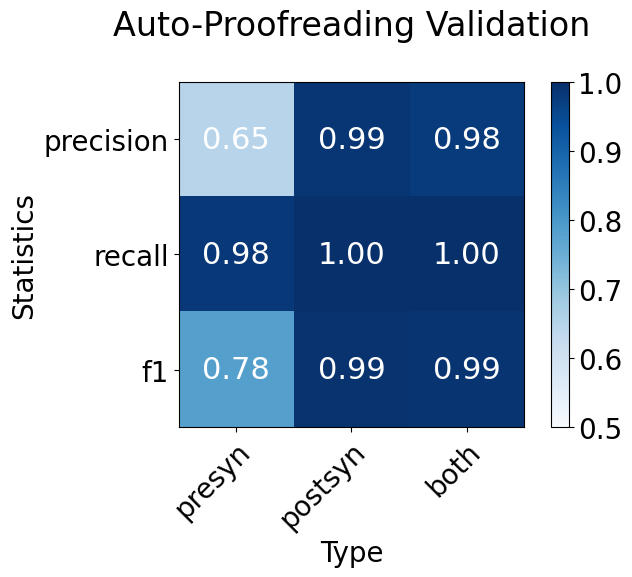

In [55]:
vu.synapse_validation_df_to_score_plot(return_validation_df_revised)

In [56]:
nviz.plot_axon(filt_neuron)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [57]:
# import neuron_visualizations as nviz
# nviz.visualize_neuron(filt_neuron,
#                       limb_branch_dict="all")

In [58]:
minnie.AutoProofreadValidationSegmentMap4() & key

ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,old_segment_id the segment id in the proofread version--,finished_dendrite whether axon was finished cleaning,finished_axon whether axon was finished cleaning,extension_type,n_somas,n_soma_mergers,n_glia,large_splits,notes
88.00,493968,864691135117980637,0.08,864691135974454383,True,True,full,1,0,0,0,


In [59]:
filt_neuron.segment_id

864691135974454383

In [66]:
vu.plot_validation_synapses(filt_neuron.segment_id,
                            validation_df = return_validation_df_revised,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

Using the mesh from the neuron object


TP:yellow
TN:aqua
FP:black
FN:orange


# How to attach the synapses

In [76]:
beginning_direct_connections = du.segment_id_to_synapse_table(filt_neuron.segment_id,
                                                                         validation=True)
beginning_direct_connections

ver materialization version,synapse_id synapse index within the segmentation,presyn segment_id of the presynaptic cell. Equivalent to Allen 'pt_root_id'.,postsyn segment_id of the postsynaptic cell. Equivalent to Allen 'pt_root_id'.,"synapse_x x coordinate of synapse centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.","synapse_y y coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.","synapse_z z coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.",synapse_size (EM voxels) scaled by (4x4x40)
89.00,302888300,864691135974454383,864691136907084654,264156,148791,26604,6828
89.00,302888550,864691135974454383,864691133768538158,264464,149196,26642,14784
89.00,302888592,864691135974454383,864691135462377373,264490,149392,26636,520
89.00,302948567,864691135666450359,864691135974454383,264350,165010,26688,6484
89.00,302948583,864691136579768860,864691135974454383,264394,165096,26699,15616
89.00,302948774,864691135678871700,864691135974454383,264718,164870,26711,5424
89.00,302948797,864691136217492314,864691135974454383,264748,164748,26685,5312
89.00,302948809,864691135513422578,864691135974454383,264760,164582,26684,3000
89.00,302948900,864691136161044570,864691135974454383,264892,165274,26616,3676
89.00,302948950,864691135586393586,864691135974454383,264988,164890,26696,3312


# Debugging the Stitch Distance

In [63]:
incorp_floating_pieces = nru.non_soma_touching_meshes_stitched(filt_neuron)
incorp_floating_pieces

array([<trimesh.Trimesh(vertices.shape=(2374, 3), faces.shape=(4736, 3))>],
      dtype=object)

In [64]:
nviz.plot_objects(meshes = incorp_floating_pieces)

In [69]:
nru.filter_branches_by_restriction_mesh(filt_neuron[2],
                                       restriction_mesh=incorp_floating_pieces[0])

array([68, 69])

In [67]:
[k for k in dir(nru) if "mesh" in k]

['all_medain_mesh_center_widths',
 'all_no_spine_median_mesh_center_widths',
 'apply_adaptive_mesh_correspondence_to_neuron',
 'axon_mesh',
 'branch_mesh_no_spines',
 'branches_combined_mesh',
 'compute_mesh_attribute_volume',
 'filter_branches_by_restriction_mesh',
 'mesh_without_boutons',
 'mesh_without_mesh_attribute',
 'neuron_mesh_from_branches',
 'non_soma_touching_meshes_not_stitched',
 'non_soma_touching_meshes_stitched',
 'original_mesh_face_to_limb_branch',
 'trimesh',
 'trimesh_io']

In [74]:
nru.find_parent_child_skeleton_angle(filt_neuron[2],68,
                                     comparison_distance=5000,
                                     offset=0,
                                    plot_extracted_skeletons=True)

Parent (25):red, child (68):blue


80.75

In [71]:
nru.upstream_node(filt_neuron[2],68)

25

In [70]:
nviz.plot_limb_path(filt_neuron[2],[68])

limb_name = L2

 Working on visualization type: mesh

 Working on visualization type: skeleton


No limb name was given so using L2 because was the limb in the first key


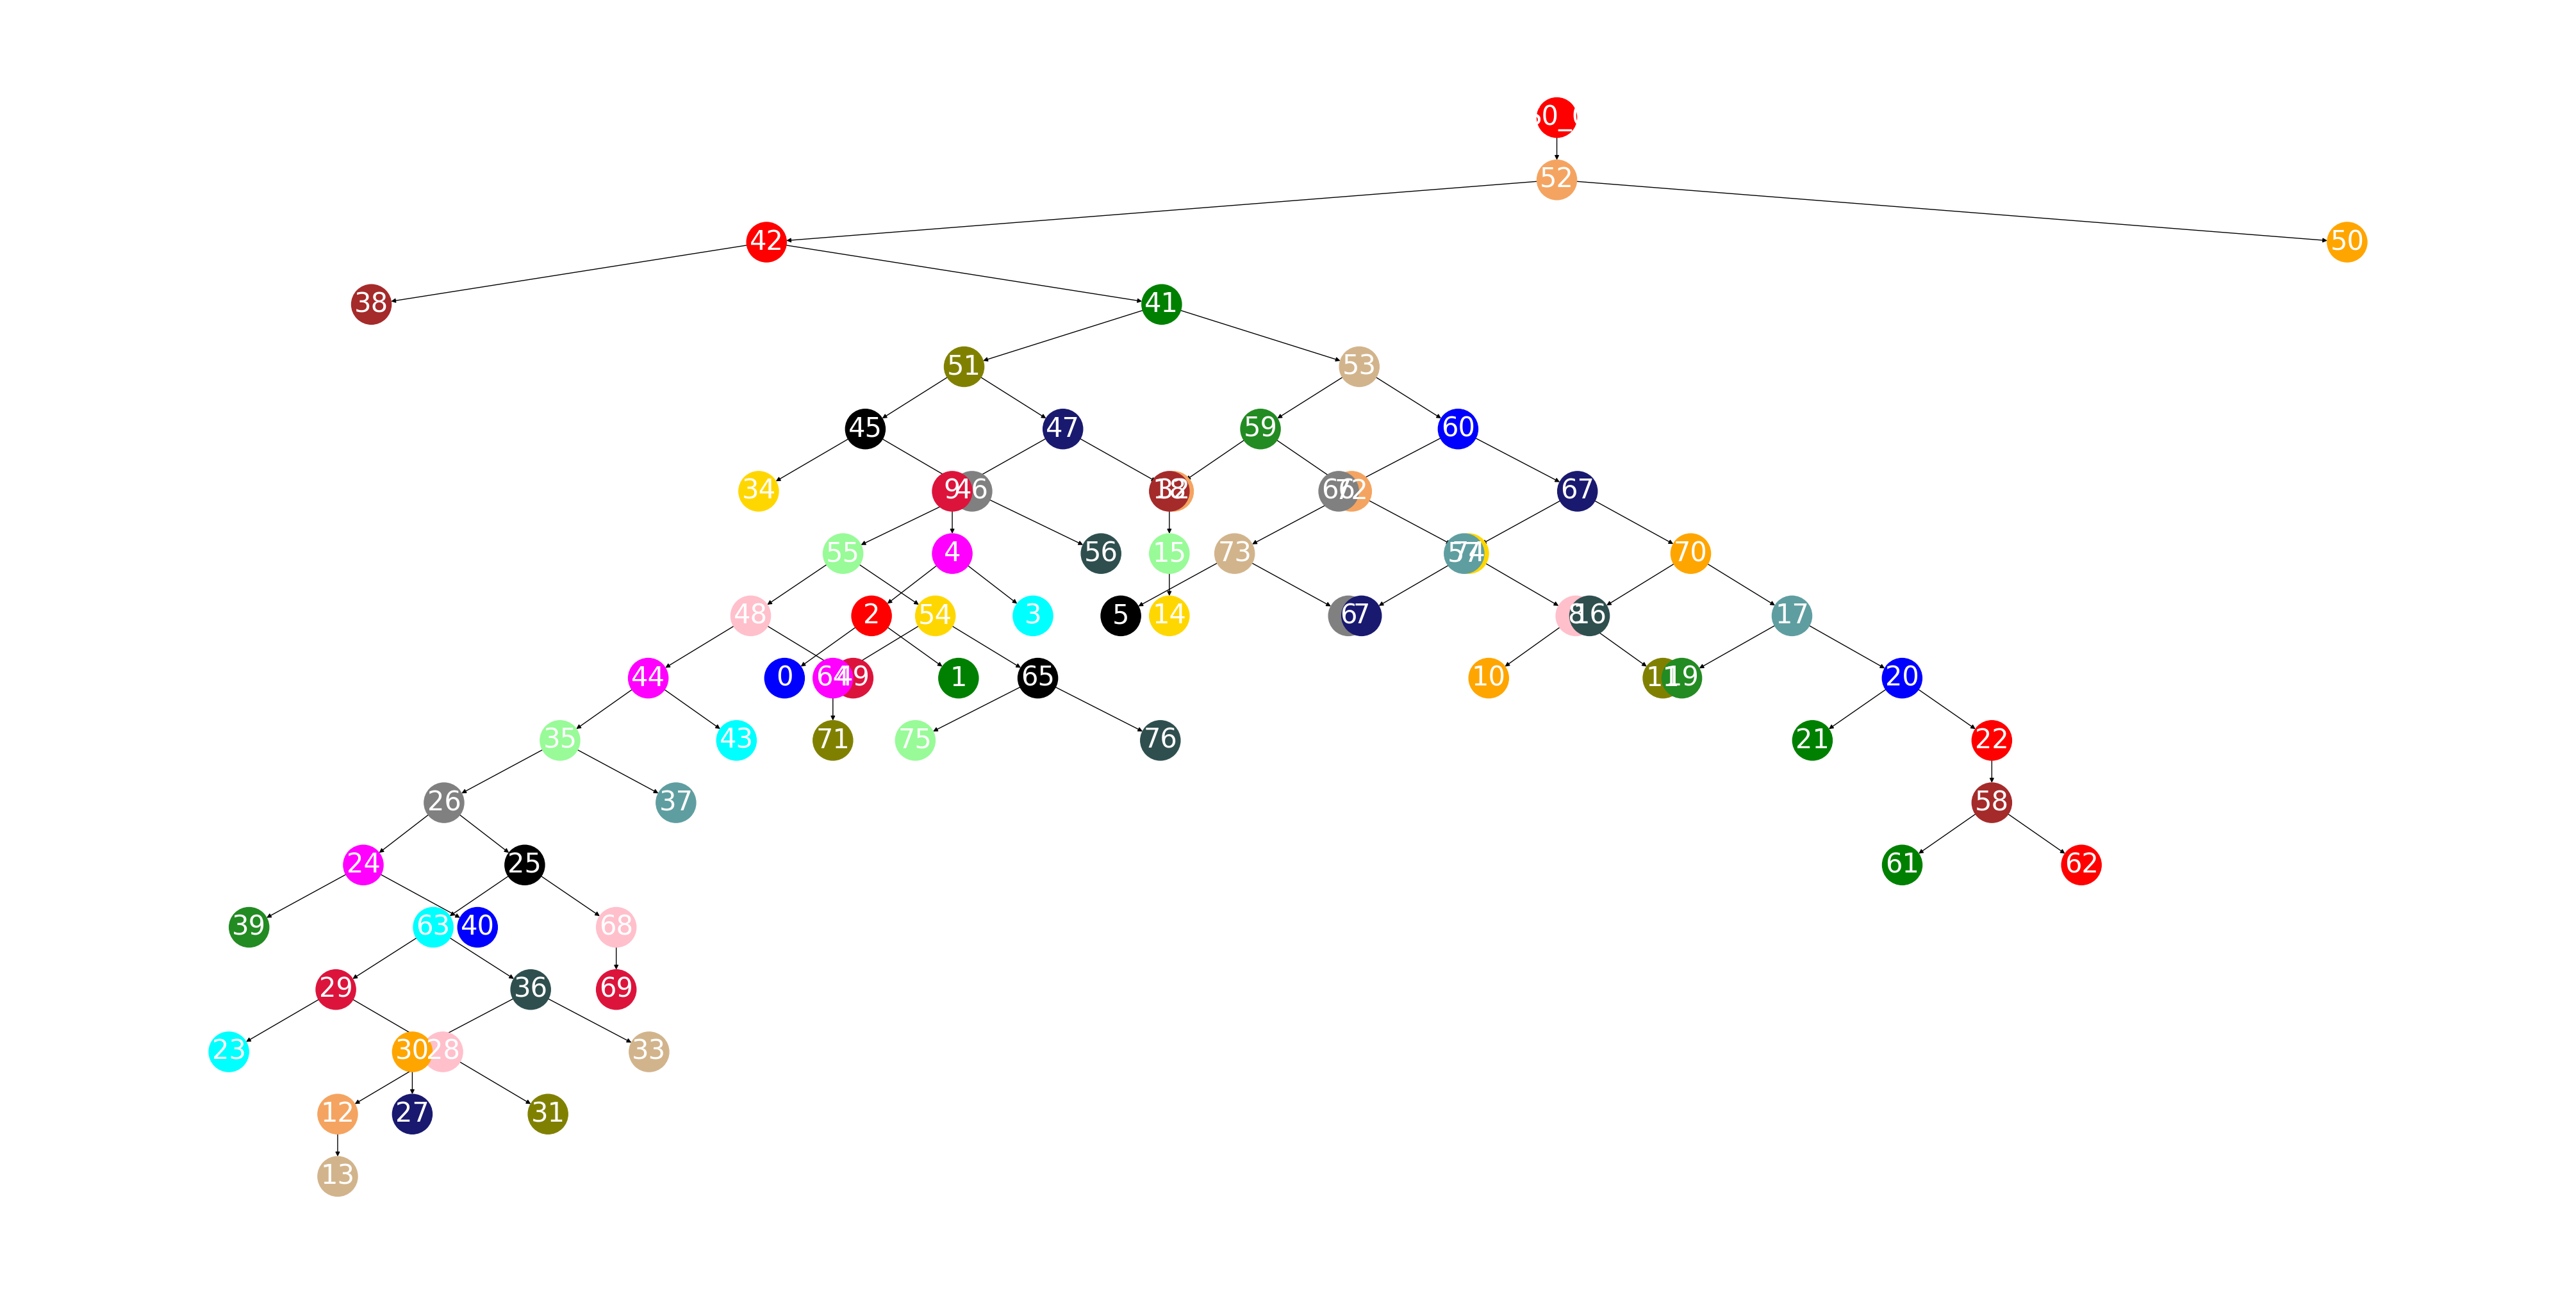

In [65]:
nviz.visualize_neuron_specific_limb(filt_neuron,
                                   filt_neuron.axon_limb_idx)

In [ ]:
minnie.AutoProofreadStats5()

In [79]:
du.plot_proofread_neuron(864691135517422218,
                         plot_proofreading_synapses=True,
                        plot_errored_faces=True)

Synapsse Results:
Total Number of Synapses = 917
n_valid_syn_ids_presyn = 620
n_errored_syn_ids_presyn = 94
n_valid_syn_ids_postsyn = 193
n_errored_syn_ids_postsyn = 10


# Checking the long Axons

In [ ]:
du.proofreading_neurons_table() & "axon_length>2000" & "spine_category='densely_spined'"

In [ ]:
du.plot_proofread_neuron(864691134917429770,
                        plot_proofreading_synapses=True)

In [ ]:
import ipyvolume as ipv
ipv.gcf()

In [ ]:
ipv.pylab.save("864691134917429770_proof_v5.html")

In [ ]:
du.plot_proofread_mesh_skeleton(864691134917429770)

In [ ]:
minnie,_ = du.configure_minnie_vm()
from importlib import reload
du = reload(du)